### This notebook creates our 2,000 sentence sampling
- In order to obtain sentences with high sentiment, we applied TextBlob subjectivity and filtered the data to sentences with subjectivity of 0.85 and higher, and sentence length between 75 and 175 characters.

In [1]:
import pandas as pd
import nltk
from textblob import TextBlob

pd.set_option('display.max_colwidth', 150)

In [2]:
df = pd.read_csv("/home/gtrane/ClassData/group03/html_project.csv", sep = '\t')
df

,file_name,article_title,article_author,company_author,date,body_text
0,Panama Reports Country's First Monkeypox Case.html,Panama Reports Country's First Monkeypox Case,Elida Moreno,Reuters Health Information,"July 06, 2022",PANAMA CITY (Reuters) - Panama registered its first case of monkeypox in a resident who was infected after being in contact with tourists from Eur...
1,How Doctors Can Manage Their Daily Work Stress.html,How Doctors Can Manage Their Daily Work Stress,Rachel Reiff Ellis,Medscape Medical News,"March 23, 2023","As a physician, you may ruminate over an interaction with a patient or worry about a complicated procedure that didn't go as expected. You work th..."
2,Climate Change Projected to Fuel Rise in Suicide Deaths.html,Climate Change Projected to Fuel Rise in Suicide Deaths,Megan Brooks,Medscape Medical News,"March 29, 2023","The warming of the planet may mean more suicides, new research suggests. New findings show a significant association between higher temperatures a..."
3,A Moral Compass Is Apparent Even in Infants.html,A Moral Compass Is Apparent Even in Infants,Medscape Staff,Quick Take,"June 13, 2022","Even babies as young as 8 months old can recognize bad behavior and punish it, according to researchers at Osaka University in Japan. What to kno..."
4,Ohio Measles Outbreak Sickens Nearly 60 Children.html,Ohio Measles Outbreak Sickens Nearly 60 Children,Lisa O'Mary,WebMD Health News,"December 07, 2022",Measles has sickened 59 children in an outbreak that began in November and now spans four Ohio counties. None of the children had been fully vacci...
...,...,...,...,...,...,...
8760,EMPA-Kidney Moves the Needle for SGLT2 Inhibitors in Kidney Disease.html,EMPA-Kidney Moves the Needle for SGLT2 Inhibitors in Kidney Disease,"Mitchel L. Zoler, PhD",Medscape Medical News,"November 04, 2022","Dr William Herrington ORLANDO, Florida — The sodium-glucose cotransporter 2 (SGLT2) inhibitor empagliflozin (Jardiance) significantly slowed prog..."
8761,Paxlovid Reduces Risk of COVID Death by 79% in Older Adults.html,Paxlovid Reduces Risk of COVID Death by 79% in Older Adults: Study,Carolyn Crist,WebMD Health News,"August 26, 2022",Editor's note: Find the latest COVID-19 news and guidance in Medscape's Coronavirus Resource Center. The antiviral drug Paxlovid appears to reduc...
8762,"'Stunning Variation' in CV Test, Procedure Cost at US Hospitals.html","'Stunning Variation' in CV Test, Procedure Costs Revealed at Top US Hospitals",Marilynn Larkin,Medscape Medical News,"July 22, 2022","Wide variation in the cost of common cardiovascular (CV) tests and procedures, from stress tests to coronary interventions, was revealed in a cros..."
8763,Patients With Schizophrenia Twice as Likely to Develop Dementia?.html,Patients With Schizophrenia Twice as Likely to Develop Dementia?,"Batya Swift Yasgur, MA, LSW",Medscape Medical News,"October 24, 2022",Patients with psychotic disorders such as schizophrenia are more than twice as likely as those without a psychotic disorder to eventually develop ...


In [3]:
#tokenize body text into sentences
df["sentences"] = df.body_text.apply(lambda x: nltk.sent_tokenize(str(x)))
df

,file_name,article_title,article_author,company_author,date,body_text,sentences
0,Panama Reports Country's First Monkeypox Case.html,Panama Reports Country's First Monkeypox Case,Elida Moreno,Reuters Health Information,"July 06, 2022",PANAMA CITY (Reuters) - Panama registered its first case of monkeypox in a resident who was infected after being in contact with tourists from Eur...,[PANAMA CITY (Reuters) - Panama registered its first case of monkeypox in a resident who was infected after being in contact with tourists from Eu...
1,How Doctors Can Manage Their Daily Work Stress.html,How Doctors Can Manage Their Daily Work Stress,Rachel Reiff Ellis,Medscape Medical News,"March 23, 2023","As a physician, you may ruminate over an interaction with a patient or worry about a complicated procedure that didn't go as expected. You work th...","[As a physician, you may ruminate over an interaction with a patient or worry about a complicated procedure that didn't go as expected., You work ..."
2,Climate Change Projected to Fuel Rise in Suicide Deaths.html,Climate Change Projected to Fuel Rise in Suicide Deaths,Megan Brooks,Medscape Medical News,"March 29, 2023","The warming of the planet may mean more suicides, new research suggests. New findings show a significant association between higher temperatures a...","[The warming of the planet may mean more suicides, new research suggests., New findings show a significant association between higher temperatures..."
3,A Moral Compass Is Apparent Even in Infants.html,A Moral Compass Is Apparent Even in Infants,Medscape Staff,Quick Take,"June 13, 2022","Even babies as young as 8 months old can recognize bad behavior and punish it, according to researchers at Osaka University in Japan. What to kno...","[Even babies as young as 8 months old can recognize bad behavior and punish it, according to researchers at Osaka University in Japan., What to kn..."
4,Ohio Measles Outbreak Sickens Nearly 60 Children.html,Ohio Measles Outbreak Sickens Nearly 60 Children,Lisa O'Mary,WebMD Health News,"December 07, 2022",Measles has sickened 59 children in an outbreak that began in November and now spans four Ohio counties. None of the children had been fully vacci...,"[Measles has sickened 59 children in an outbreak that began in November and now spans four Ohio counties., None of the children had been fully vac..."
...,...,...,...,...,...,...,...
8760,EMPA-Kidney Moves the Needle for SGLT2 Inhibitors in Kidney Disease.html,EMPA-Kidney Moves the Needle for SGLT2 Inhibitors in Kidney Disease,"Mitchel L. Zoler, PhD",Medscape Medical News,"November 04, 2022","Dr William Herrington ORLANDO, Florida — The sodium-glucose cotransporter 2 (SGLT2) inhibitor empagliflozin (Jardiance) significantly slowed prog...","[Dr William Herrington ORLANDO, Florida — The sodium-glucose cotransporter 2 (SGLT2) inhibitor empagliflozin (Jardiance) significantly slowed pro..."
8761,Paxlovid Reduces Risk of COVID Death by 79% in Older Adults.html,Paxlovid Reduces Risk of COVID Death by 79% in Older Adults: Study,Carolyn Crist,WebMD Health News,"August 26, 2022",Editor's note: Find the latest COVID-19 news and guidance in Medscape's Coronavirus Resource Center. The antiviral drug Paxlovid appears to reduc...,"[Editor's note: Find the latest COVID-19 news and guidance in Medscape's Coronavirus Resource Center., The antiviral drug Paxlovid appears to redu..."
8762,"'Stunning Variation' in CV Test, Procedure Cost at US Hospitals.html","'Stunning Variation' in CV Test, Procedure Costs Revealed at Top US Hospitals",Marilynn Larkin,Medscape Medical News,"July 22, 2022","Wide variation in the cost of common cardiovascular (CV) tests and procedures, from stress tests to coronary interventions, was revealed in a cros...","[Wide variation in the cost of common cardiovascular (CV) tests and procedures, from stress tests to coronary interventions, was revealed in a cro..."
8763,Patients With Schizophrenia Twice as Likely to Develop Dementia?.html,Patient

In [4]:
#merge all identified sentences
#add all the lists into one list
all_sentences = []

for idx, row in df.iterrows():
    sentences = row.sentences
    
    all_sentences.append(sentences)
    
#make one list instead of a list of lists  
full_sentences = [sentence for sentences in all_sentences for sentence in sentences]
full_sentences[:100]

["PANAMA CITY (Reuters) - Panama registered its first case of monkeypox in a resident who was infected after being in contact with tourists from Europe, Panama's health ministry said Tuesday.",
 '"Yesterday in the afternoon, the first case of monkeypox in our country was confirmed," Health Minister Luis Sucre said during a press conference, adding the patient "is completely stable" and the "case is properly controlled."',
 'The patient, whose nationality and sex were not revealed, was isolating at home after being notified of a possible monkeypox infection, Sucre said.',
 'The person was later transferred to a medical facility.',
 'Three lesions typical of monkeypox were found on the patient\'s body, though the person is "practically asymptomatic," authorities said.',
 'Tests confirmed the patient was infected with the "least serious" strain of monkeypox, which is less lethal, according to the director of the Gorgas Memorial Laboratory, Juan Pascale.',
 'More than 50 countries around t

In [5]:
len(full_sentences) # a total of 292,558 sentences

292558

In [6]:
#Create CSV for all sentences
df_all_sent = pd.DataFrame(full_sentences, columns = ['sentence'])
df_all_sent

,sentence
0,PANAMA CITY (Reuters) - Panama registered its first case of monkeypox in a resident who was infected after being in contact with tourists from Eur...
1,"""Yesterday in the afternoon, the first case of monkeypox in our country was confirmed,"" Health Minister Luis Sucre said during a press conference,..."
2,"The patient, whose nationality and sex were not revealed, was isolating at home after being notified of a possible monkeypox infection, Sucre said."
3,The person was later transferred to a medical facility.
4,"Three lesions typical of monkeypox were found on the patient's body, though the person is ""practically asymptomatic,"" authorities said."
...,...
292553,The study was funded by grants to multiple researchers from the National Science and Technology Major Project of the Ministry of Science and Techn...
292554,The researchers have disclosed no relevant financial relationships.
292555,Chest.
292556,"Published online July 18, 2022."


In [7]:
#df_all_sent.to_csv("allSentences.csv", sep = "\t")

### Use subjective score of TextBlob to find rich sentiments in 2,000 sample

In [8]:
df_all_sent['Sentence_Subjectivity'] = df_all_sent.sentence.apply(lambda x: TextBlob(x).sentiment.subjectivity)
df_all_sent

,sentence,Sentence_Subjectivity
0,PANAMA CITY (Reuters) - Panama registered its first case of monkeypox in a resident who was infected after being in contact with tourists from Eur...,0.333333
1,"""Yesterday in the afternoon, the first case of monkeypox in our country was confirmed,"" Health Minister Luis Sucre said during a press conference,...",0.458333
2,"The patient, whose nationality and sex were not revealed, was isolating at home after being notified of a possible monkeypox infection, Sucre said.",1.000000
3,The person was later transferred to a medical facility.,0.000000
4,"Three lesions typical of monkeypox were found on the patient's body, though the person is ""practically asymptomatic,"" authorities said.",0.500000
...,...,...
292553,The study was funded by grants to multiple researchers from the National Science and Technology Major Project of the Ministry of Science and Techn...,0.291667
292554,The researchers have disclosed no relevant financial relationships.,0.450000
292555,Chest.,0.000000
292556,"Published online July 18, 2022.",0.000000


In [9]:
df_all_sent['Sentence_Length'] = df_all_sent.sentence.apply(lambda x: len(x))
df_all_sent

,sentence,Sentence_Subjectivity,Sentence_Length
0,PANAMA CITY (Reuters) - Panama registered its first case of monkeypox in a resident who was infected after being in contact with tourists from Eur...,0.333333,189
1,"""Yesterday in the afternoon, the first case of monkeypox in our country was confirmed,"" Health Minister Luis Sucre said during a press conference,...",0.458333,227
2,"The patient, whose nationality and sex were not revealed, was isolating at home after being notified of a possible monkeypox infection, Sucre said.",1.000000,147
3,The person was later transferred to a medical facility.,0.000000,55
4,"Three lesions typical of monkeypox were found on the patient's body, though the person is ""practically asymptomatic,"" authorities said.",0.500000,135
...,...,...,...
292553,The study was funded by grants to multiple researchers from the National Science and Technology Major Project of the Ministry of Science and Techn...,0.291667,190
292554,The researchers have disclosed no relevant financial relationships.,0.450000,67
292555,Chest.,0.000000,6
292556,"Published online July 18, 2022.",0.000000,31


array([[<Axes: title={'center': 'Sentence_Subjectivity'}>]], dtype=object)

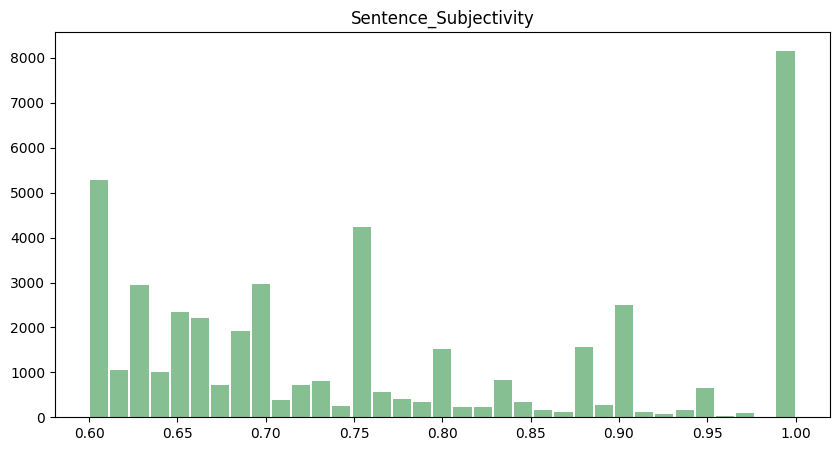

In [10]:
#subjectivity histogram
df_all_sent.hist(column='Sentence_Subjectivity', bins=35, grid=False, figsize=(10,5), color='#86bf91', zorder=2, rwidth=0.9, range=[.6, 1.0])

array([[<Axes: title={'center': 'Sentence_Length'}>]], dtype=object)

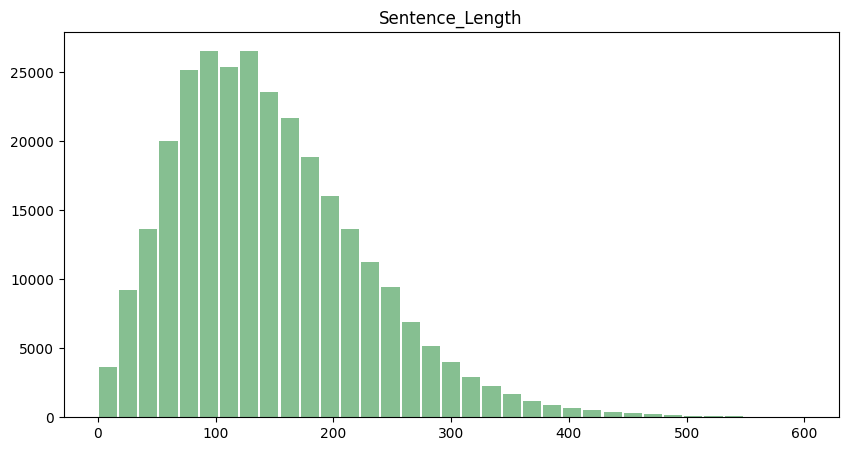

In [11]:
df_all_sent.hist(column='Sentence_Length', bins=35, grid=False, figsize=(10,5), color='#86bf91', zorder=2, rwidth=0.9, range=[0, 600])

In [12]:
#Based on histogram, use 75 to 175 words
dftemp = df_all_sent[df_all_sent.Sentence_Length >= 75 ] 
dftemp = dftemp[dftemp.Sentence_Length <= 175]
dftemp

,sentence,Sentence_Subjectivity,Sentence_Length
2,"The patient, whose nationality and sex were not revealed, was isolating at home after being notified of a possible monkeypox infection, Sucre said.",1.000000,147
4,"Three lesions typical of monkeypox were found on the patient's body, though the person is ""practically asymptomatic,"" authorities said.",0.500000,135
6,More than 50 countries around the world where monkeypox is not endemic have reported outbreaks of the viral disease as total recorded cases exceed...,0.625000,169
7,(Reporting by Eli Moreno; Writing by Kylie Madry; Editing by Marguerita Choy),0.000000,77
8,"As a physician, you may ruminate over an interaction with a patient or worry about a complicated procedure that didn't go as expected.",0.700000,134
...,...,...,...
292548,"These events included blurred vision and dizziness, which occurred in two TIS patients and was deemed related to the study drug.",0.400000,128
292549,"One TIS patient died as a result of acute myocardial infarction, but this was deemed to be unrelated to the study drug.",0.900000,119
292551,"Other limitations include a lack of data on the effects of TIS on microorganisms other than P aeruginosa, as well as limited outpatient visits, ow...",0.297619,175
292552,"However, the results confirm the ability of TIS nebulization to reduce P aeruginosa and improve quality of life for adult patients with bronchiect...",0.300000,173


In [13]:
#grab subjectivity scores 0.85 and above
sample = dftemp[dftemp.Sentence_Subjectivity >= 0.85]
sample

,sentence,Sentence_Subjectivity,Sentence_Length
2,"The patient, whose nationality and sex were not revealed, was isolating at home after being notified of a possible monkeypox infection, Sucre said.",1.000000,147
111,There's no way of knowing which children will become so sick they have to be hospitalized.,0.857143,90
112,"The safest way to protect children from measles is to make sure they are vaccinated with MMR.""",0.888889,94
124,"If possible, feed your baby breastmilk because it has antibodies to prevent and fight infections.",1.000000,97
256,"“This is a massive shift that is, quite honestly, 30 years overdue,” Allen said.",0.950000,80
...,...,...,...
292370,"Another potential therapeutic class on the horizon, known as TPK inhibitors, addresses the smoldering of the disease.",1.000000,117
292380,Relapse no longer gauges the prognosis of today's MS patient – a prognosis both experts think will only continue to improve with forthcoming innov...,1.000000,153
292417,"""We are the country's leader in the provision of giving Paxlovid to relevant patients,"" he said.",0.900000,96
292452,"""Only 80% of the hospitals reported prices for some cardiovascular tests and procedures,"" Wadhera said.",1.000000,103


In [14]:
#create 2,000 sentence sample
sample = sample.sample(2000, replace=False, random_state=1)
sample

,sentence,Sentence_Subjectivity,Sentence_Length
266448,Giori agreed that surgeons should only proceed with surgical cases they feel comfortable with.,0.900000,94
35146,"If you're the doctor who reported the misbehavior, you're potentially opening a can of worms.",1.000000,93
88447,"""This study is unique in including a very large number of patients, which enabled important subgroup analyses.""",0.852381,111
134291,"""The fact that we can't even do that suggests that we've gotten the balance wrong.""",0.900000,83
291037,Her screams and the speeding truck prompted neighbors to report a possible abduction.,1.000000,85
...,...,...,...
156383,"Forrest concluded that: ""These results provide patients and heart teams important data to aid in the shared decision-making process.""",1.000000,133
30453,"The Washington Post: ""School shootings rose to highest number in 20 years, federal data says.""",0.950000,94
74172,The research team found a significant survival benefit for patients receiving a living-donor liver transplant based on mortality risk and survival...,0.875000,154
267749,"One reason for this imbalance is that the mRNA vaccines that have been so successful in wealthy nations are novel, expensive and technologically c...",0.912500,168


In [15]:
#sample.to_csv("sentenceSample.csv", sep = "\t")

In [16]:
# get the index values of rows in df1 that are also in df2
#index_values_to_drop = df_all_sent[df_all_sent.isin(sample)].dropna().index

# drop the rows with those index values from df1
#filtered_df = df_all_sent.drop(index_values_to_drop)

# print the filtered dataframe
#filtered_df

In [17]:
#filtered_df.to_csv("non2000Data.csv", sep = "\t")